In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
#df = pd.read_csv()
#sns.countplot(x=column,data=df)
#df.isnull().sum()
#df[column].replace([some,things],[any,things],inplace=True)
#df[column].fillna(something,inpalce=True)
#df=df.astype(float) => df.info()
#df.describe()

In [2]:
test = pd.read_csv("test.csv")
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
train = pd.read_csv("train.csv")
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df = pd.concat([train,test],sort=False)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [6]:
#特徴量エンジニアリング
#文字のデータを数字に直していく
df["Sex"].replace(["male","female"],[0,1],inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,S


In [7]:
df["Embarked"].replace(["S","C","Q"],[0,1,2],inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,0.0
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,1.0
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0.0
416,1308,NaN,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,0.0


<AxesSubplot:xlabel='Age', ylabel='count'>

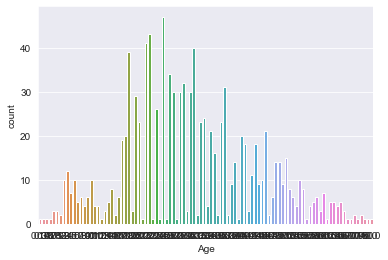

In [8]:
sns.countplot(x="Age",data=df)

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,1309.000000,891.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1307.000000
mean,655.000000,0.383838,2.294882,0.355997,29.881138,0.498854,0.385027,33.295479,0.394797
std,378.020061,0.486592,0.837836,0.478997,14.413493,1.041658,0.865560,51.758668,0.653817
min,1.000000,0.000000,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,655.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,982.000000,1.000000,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,1309.000000,1.000000,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,2.000000


<AxesSubplot:xlabel='Age', ylabel='count'>

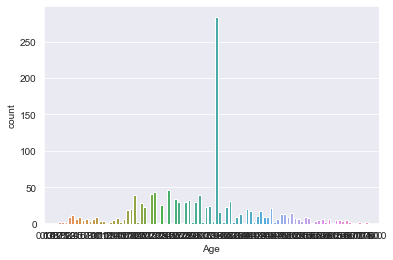

In [10]:
age_avg = df['Age'].mean()
age_std = df['Age'].std()
df['Age'].fillna(np.random.randint(age_avg - age_std, age_avg + age_std), inplace=True)
sns.countplot(x="Age",data=df)
#統計学的にNUllの値が多い場合に中央値を代入するべきなのか＝＞だいぶ偏りが出ると思う．それか，第一四部位数と第三四部位数の間でランダムに埋めていった方が良いのか

In [11]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [12]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",0,33.0,0,0,A.5. 3236,8.0500,NaN,0.0
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,1.0
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0.0
416,1308,NaN,3,"Ware, Mr. Frederick",0,33.0,0,0,359309,8.0500,NaN,0.0


In [13]:
df["Fare"].fillna(df["Fare"].mean(),inplace=True)
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

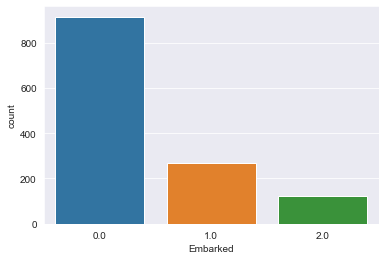

In [14]:
sns.countplot(x="Embarked",data=df)

In [15]:
df["Embarked"].fillna(0.0,inplace=True)

In [16]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64

In [17]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",0,33.0,0,0,A.5. 3236,8.0500,NaN,0.0
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,1.0
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0.0
416,1308,NaN,3,"Ware, Mr. Frederick",0,33.0,0,0,359309,8.0500,NaN,0.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   int64  
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   float64
dtypes: float64(4), int64(5), object(3)
memory usage: 165.2+ KB


In [19]:
list = []
for i in df.keys():
    if df[i].dtype == object:
        list.append(i)
list

['Name', 'Ticket', 'Cabin']

In [20]:
df.drop(list,axis=1,inplace=True)

In [21]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,0,22.0,1,0,7.2500,0.0
1,2,1.0,1,1,38.0,1,0,71.2833,1.0
2,3,1.0,3,1,26.0,0,0,7.9250,0.0
3,4,1.0,1,1,35.0,1,0,53.1000,0.0
4,5,0.0,3,0,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,0,33.0,0,0,8.0500,0.0
414,1306,NaN,1,1,39.0,0,0,108.9000,1.0
415,1307,NaN,3,0,38.5,0,0,7.2500,0.0
416,1308,NaN,3,0,33.0,0,0,8.0500,0.0


In [22]:
len(test)

418

In [23]:
df_heatmap = df[:len(train)]
df_heatmap.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [24]:
df_heatmap

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,0,22.0,1,0,7.2500,0.0
1,2,1.0,1,1,38.0,1,0,71.2833,1.0
2,3,1.0,3,1,26.0,0,0,7.9250,0.0
3,4,1.0,1,1,35.0,1,0,53.1000,0.0
4,5,0.0,3,0,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,0,27.0,0,0,13.0000,0.0
887,888,1.0,1,1,19.0,0,0,30.0000,0.0
888,889,0.0,3,1,33.0,1,2,23.4500,0.0
889,890,1.0,1,0,26.0,0,0,30.0000,1.0


In [25]:
#特徴量変数ではないone-hot形式のカラムにダミー変数を追加する
list = []
for i in df_heatmap.keys():
    dummy = True
    for k in df_heatmap[i]:
        if k !=0.0 and k != 1.0:
            dummy = False
            break
    if dummy:
        list.append(i)
list.remove("Survived")
#作成したリストに対応するカラムを全てダミー変数化
df_heatmap = pd.get_dummies(data=df_heatmap,columns=list)
df_heatmap

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_0,Sex_1
0,1,0.0,3,22.0,1,0,7.2500,0.0,1,0
1,2,1.0,1,38.0,1,0,71.2833,1.0,0,1
2,3,1.0,3,26.0,0,0,7.9250,0.0,0,1
3,4,1.0,1,35.0,1,0,53.1000,0.0,0,1
4,5,0.0,3,35.0,0,0,8.0500,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,27.0,0,0,13.0000,0.0,1,0
887,888,1.0,1,19.0,0,0,30.0000,0.0,0,1
888,889,0.0,3,33.0,1,2,23.4500,0.0,0,1
889,890,1.0,1,26.0,0,0,30.0000,1.0,1,0


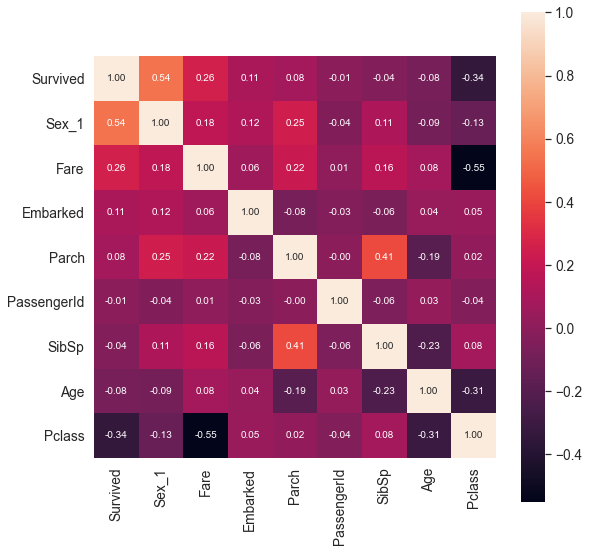

In [28]:
corrmat = df_heatmap.corr()
k =  9#number of variables for heatmap
cols = corrmat.nlargest(k, 'Survived')['Survived'].index
cm = np.corrcoef(df_heatmap[cols].values.T)
plt.figure(figsize=(9,9)) #可以調整大小
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},yticklabels = cols.values, xticklabels = cols.values)
plt.show()

In [33]:
list = ["Pclass","Age","SibSp","PassengerId","Parch","Embarked"]
df_sample = df
df_sample.drop(list,axis=1,inplace=True)
df_sample

,Survived,Sex,Fare
0,0.0,0,7.2500
1,1.0,1,71.2833
2,1.0,1,7.9250
3,1.0,1,53.1000
4,0.0,0,8.0500
...,...,...,...
413,NaN,0,8.0500
414,NaN,1,108.9000
415,NaN,0,7.2500
416,NaN,0,8.0500


In [46]:
df_train = df[:len(train)]
df_test = df[:len(train):]
list = ["Sex","Fare"]
df_train_feature = df_train[list]
train_label = np.array(df_train["Survived"])
df_test_feature = df_test[list]
test_label = np.array(df_test["Survived"])
from sklearn import preprocessing
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
train_feature = minmax_scale.fit_transform(df_train_feature)
test_feature = minmax_scale.fit_transform(df_test_feature)
print(test_label)

[0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1.
 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0.
 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1.
 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0.
 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1.
 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1.

In [47]:
print(train_feature[0])
print(train_label[0])
print(test_feature[0])
print(test_label[0])

[0.         0.01415106]
0.0
[0.         0.01415106]
0.0


In [48]:
train_feature.shape

(891, 2)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 500)               1500      
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 200)               100200    
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 201       
Total params: 101,901
Trainable params: 101,901
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/20
4/4 - 1s - loss: 0.6911 - accuracy: 0.6952 - val_loss: 0.6862 - val_accuracy: 0.7989
Epoch 2/20
4/

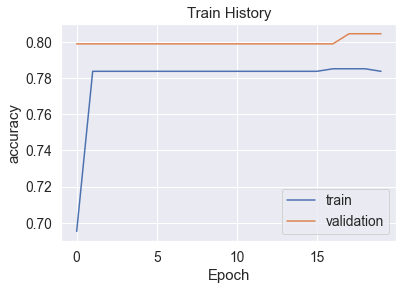

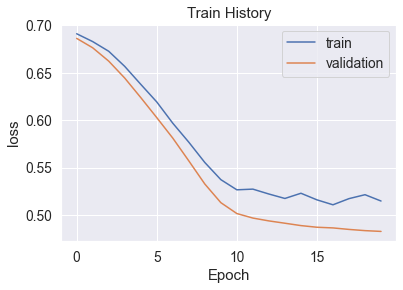

In [49]:
#The model should run very fast because the data was really small.
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='best')
    plt.show()


######################### Model designing
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

model = Sequential() 

#Input layer
model.add(Dense(units=500, 
                input_dim=2, 
                kernel_initializer='uniform', 
                activation='relu'))
model.add(Dropout(0.5))

#Hidden layer 1
model.add(Dense(units=200,  
                kernel_initializer='uniform', 
                activation='relu'))
model.add(Dropout(0.5))

#Output layer
model.add(Dense(units=1,
                kernel_initializer='uniform', 
                activation='sigmoid'))

print(model.summary()) #for showing the structure and parameters

# Defining how to measure performance
model.compile(loss='binary_crossentropy',   
              optimizer='adam', metrics=['accuracy'])

# Train the model
# Verbose=2, showing loss and accuracy change timely
train_history = model.fit(x=train_feature, y=train_label,  
                          validation_split=0.2, epochs=20, 
                          batch_size=200, verbose=2) 

#visualize the loss and accuracy after each epoch
show_train_history(train_history,'accuracy','val_accuracy')
show_train_history(train_history,'loss','val_loss')

In [50]:
#学習が終わったりモデルを作成できたのでモデルの推論のaccを求める
scores = model.evaluate(test_feature,test_label)
print('\n')
print('accuracy=',scores[1])

28/28 [==============================] - 0s 2ms/step - loss: 0.5047 - accuracy: 0.7890


accuracy= 0.7890011072158813


In [51]:
#提出するcsvデータを作成する
#ラベルとpredictionの二つのカラムからなるcsvにする
# Answer sheet
prediction = model.predict_classes(test_feature)

In [52]:
df_ans = pd.DataFrame({'Survived' :test_label})
df_ans['Prediction'] = prediction
df_ans

,Survived,Prediction
0,0.0,0
1,1.0,1
2,1.0,1
3,1.0,1
4,0.0,0
...,...,...
886,0.0,0
887,1.0,1
888,0.0,1
889,1.0,0


In [54]:
#predとbiopsyの違いを見る
df_ans[ df_ans['Survived'] != df_ans['Prediction'] ]

,Survived,Prediction
14,0.0,1
17,1.0,0
18,0.0,1
21,1.0,0
23,1.0,0
...,...,...
869,1.0,0
882,0.0,1
885,0.0,1
888,0.0,1


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
#df = pd.read_csv()
#sns.countplot(x=column,data=df)
#df.isnull().sum()
#df[column].replace([some,things],[any,things],inplace=True)
#df[column].fillna(something,inpalce=True)
#df=df.astype(float) => df.info()
#df.describe()
#delete_columns = ['e', 'x', 'a', 'm', 'p', 'l', 'e']
#df.drop(delete_columns, axis=1, inplace=True)